In [3]:
from scipy.integrate import odeint 
from scipy import array
import matplotlib.pyplot as plt
import numpy as np 

#Definimos el sistema de ecuaciones de VanDerPol, donde x es la posicion, y es la primera derivada de x
#y dx_y es la derivada de y/segunda derivada de x
def vectorfield(X,t=0):
    x = X[0]
    y = X[1]
    dx = y
    dx_y = b*(1 - x**2)*dx - x + A * np.sin(w*t)
    return array([dx, dx_y])

In [6]:
stoptime = 600
numpoints = 2500

#Creamos los valores del tiempo a utilizar
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

#Condiciones iniciales
x0 = 0
v0 = 0

#Coeficiente de amortiguamiento
b = 8.53

#Amplitud
A = 1.2

#Omega
w = (2 * np.pi)/10

#Resolvemos el sistema de ecuaciones
x, y = odeint(vectorfield,(x0,v0),t).T

with open('VanDerPolForzado.dat', 'w') as f:
    for t1, x1,y1 in zip(t, x, y):
        print (t1, x1,y1 ,file=f)

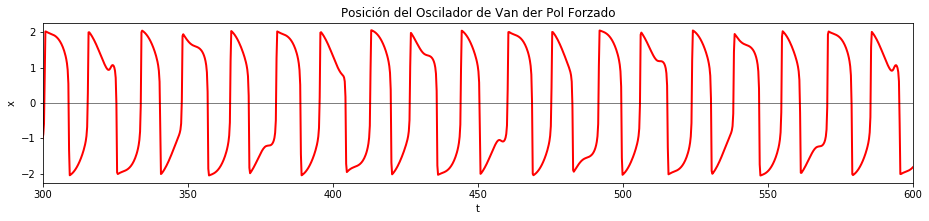

In [11]:
from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig, ylabel
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
%matplotlib inline

t, x, y = loadtxt('VanDerPolForzado.dat', unpack=True)

figure(1, figsize=(15.59, 2.94))

xlabel('t')
ylabel('x')
lw = 2

plt.xlim(300,600)

plot(t, x, 'red', linewidth=lw)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)

title('Posición del Oscilador de Van der Pol Forzado')
savefig('Im4.png', dpi=100)